$\color{blue}{\huge {\text{4. Getting Started with Neural Networks: Classification and Regression}}}$

This chapter will apply three new tasks covering the three most common use cases of neural networks—binary classification, multiclass classification, and scalar regression:

• Classifying movie reviews as positive or negative (binary classification)<br>
• Classifying news wires by topic (multiclass classification)<br>
• Estimating the price of a house, given real-estate data (scalar regression)<br>

By the end of this chapter, you’ll be able to use neural networks to handle simple classification and regression tasks over vector data. You’ll then be ready to start building a more principled, theory-driven understanding of machine learning in chapter 5.

<h3><span style="color:black">4.1 Classifying Movie Reviews: A Binary Classification Example</span></h3>

#### 4.1.1 The IMDB dataset
You’ll work with the IMDB dataset: a set of 50,000 highly polarized reviews from the Internet Movie Database. They’re split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting of 50% negative and 50% positive reviews.<br>
The following code will load the dataset (when you run it the first time, about 80 MB of data will be downloaded to your machine).

##### Listing 4.1 Loading the IMDB dataset:

In [202]:
# from tensorflow.keras.datasets import imdb
# (train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/Users/russellconte/miniforge3/lib/python3.9/site-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/russellconte/miniforge3/lib/python3.9/site-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or s

The variables `train_data` and `test_data` are lists of reviews; each review is a list of word indices (encoding a sequence of words). `train_labels` and `test_labels` are lists of 0s and 1s, where 0 stands for <b><i><span style="color:blue">negative</span></i></b> and 1 stands for <b><i><span style="color:blue">positive:</span></i></b>

In [203]:
print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


For kicks, here's how you can quickly decode one of these reviews back to English words:
##### Listing 4.2 Decoding reviews back to text:

In [204]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
print(decoded_review) # allows me to see the review! Yay, this works!

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

#### 4.1.2 Preparing the data
You can’t directly feed lists of integers into a neural network. They have all different lengths, but a neural network expects to process contiguous batches of data. You have to turn your lists into tensors. There are two ways to do that:<br>
<br>• Pad your lists so that they all have the same length, then turn them into an integer tensor of shape `(samples, max_length)`, and start your model with a layer capable of handling such integer tensors (the `Embedding layer`, which we’ll cover in detail later in the book).<br>
• <b><i><span style="color:blue">Multi-hot encode</span></i></b> your lists to turn them into vectors of 0s and 1s. This would mean, for instance, turning the sequence [8, 5] into a 10,000-dimensional vector that would be all 0s except for indices 8 and 5, which would be 1s. Then you could use a `Dense` layer, capable of handling floating-point vector data, as the first layer in your model.

#### Listing 4.3 Encoding the integer sequences via multi-hot encoding

In [205]:
# import numpy as np
# def vectorize_sequences(sequences, dimension = 10000):
#     results = np.zeros((len(sequences), dimension))
#     for i, sequence in enumerate(sequences):
#         for j in sequence:
#             results[i, j] = 1.
#         return results
# x_train = vectorize_sequences(train_data)
# x_test = vectorize_sequences(test_data)
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

• Creates an all-zero matrix of shape (`len(sequences`), `dimension`)<br>
• Sets specific indices of results[i] to 1s<br>
• Vectorized training data<br>
• Vectorized test data<br>

Here's what the samples look like now:

In [206]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

You should also vectorize your lables, which is straightforward:

In [207]:
y_train = np.asarray(train_labels.astype("float32"))
y_test = np.array(test_labels).astype("float32")

#### 4.1.3 Build Your Model
The input data is vectors, and the labels are scalars (1s and 0s): this is one of the simplest problem setups you’ll ever encounter. A type of model that performs well on such a problem is a plain stack of densely-connected (`Dense`) layers with `relu` activations.<br>
There are two key architecture decisions to be made about such a stack of Dense layers:<br><br>
• How many layers to use<br>
• How many units to choose for each layer

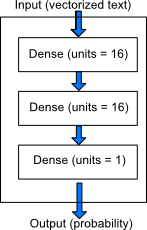

In [208]:
from IPython.display import Image
Image(filename= "4.1_The_three-layer_model.jpg")
#### Listing 4.1 Model Definition

In [209]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


The intermediate layers use relu as their activation function, and the final layer uses a sigmoid activation so as to output a probability (a score between 0 and 1, indicating how likely the sample is to have the target "1": how likely the review is to be positive). A `relu` (rectified linear unit) is a function meant to zero out negative values (see figure 4.2), whereas a sigmoid "squashes" arbitrary values into the `[0, 1]` interval (see figure 4.3), outputting something that can be interpreted as a probability.

Text(0, 0.5, '$f(x)$')

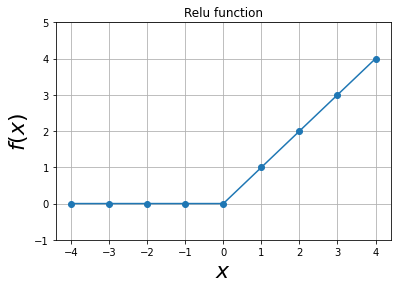

In [210]:
# courtesy of http://www.kawahara.ca/ipython/ReLU.html
# Import needed libraries and other python stuff here.
# Show figures directly in the notebook.
%matplotlib inline
import matplotlib.pyplot as plt # For plotting.
import numpy as np # To create matrices.
# Here we define the ReLU function.
def f(x):
    """ReLU returns 1 if x>0, else 0."""
    return np.maximum(0,x)
X = np.arange(-4,5,1)
Y = f(X)
plt.plot(X,Y,'o-')
plt.title('Relu function')
plt.ylim(-1,5); plt.grid(); plt.xlabel('$x$', fontsize=22); plt.ylabel('$f(x)$', fontsize=22)

Text(0.5, 1.0, 'Sigmoid function')

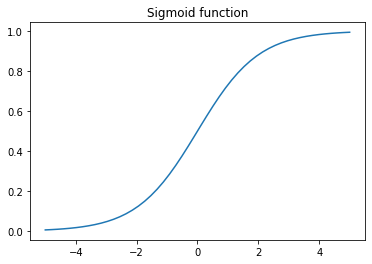

In [211]:
# Courtesy of https://stackoverflow.com/questions/55959156/how-can-i-graph-a-numerical-function-using-python-and-matplotlib

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(arr, scale=1):
    arr = np.asarray(arr)
    result = 1/(1 + np.exp(-arr*scale))
    return result

x = np.linspace(-5, 5)
y = sigmoid(x)
fig, ax = plt.subplots()
ax.plot(x, y)
plt.title('Sigmoid function')

Finally, you need to choose a loss function and an optimizer. Because you’re facing a binary classification problem and the output of your model is a probability (you end your model with a single-unit layer with a sigmoid activation), it’s best to use the `binary_crossentropy` loss. It isn’t the only viable choice: you could use, for instance, `mean_squared_error`. But crossentropy is usually the best choice when you’re dealing with models that output probabilities.
#### Listing 4.5 Compiling the model

In [212]:
model.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

#### 4.14 Validating your approach
As you learned in chapter 3, a deep learning model should never be evaluated on its training data—it’s standard practice to use a "validation set" to monitor the accuracy of the model during training. Here, you’ll create a validation set by setting apart 10,000 samples from the original training data.
#### Listing 4.6 Setting aside a validation set

In [213]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

You’ll now train the model for 20 epochs (20 iterations over all samples in the training data), in mini-batches of 512 samples. At the same time, you’ll monitor loss and accuracy on the 10,000 samples that you set apart. You do so by passing the validation data as the `validation_data` argument.
#### Listing 4.7 Training your model

In [214]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
 1/30 [>.............................] - ETA: 11s - loss: 0.6903 - accuracy: 0.5352

2021-09-11 11:08:22.063483: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


29/30 [============================>.] - ETA: 0s - loss: 0.4980 - accuracy: 0.7986 

2021-09-11 11:08:22.971995: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 33ms/step - loss: 0.4968 - accuracy: 0.7993 - val_loss: 0.3839 - val_accuracy: 0.8601
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3003 - accuracy: 0.9005 - val_loss: 0.3139 - val_accuracy: 0.8785
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2177 - accuracy: 0.9301 - val_loss: 0.2775 - val_accuracy: 0.8904

The dictionary contains four entries: one per metric that was being monitored during training and during validation. In the following two listing, let’s use Matplotlib to plot the training and validation loss side by side (see figure 4.4), as well as the training and validation accuracy (see figure 4.5). Note that your own results may vary slightly due to a different random initialization of your model.
#### Listing 4.8 Plotting the training and validation losses:

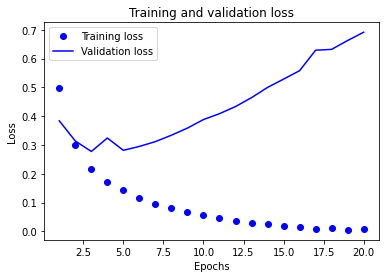

In [215]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label = "Training loss")
plt.plot(epochs, val_loss_values, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In precise terms, what you’re seeing is <b><i><span style="color:blue">overfitting</span></i></b>: after the fourth epoch, you’re over-optimizing on the training data, and you end up learning representations that are specific to the training data and don’t generalize to data outside of the training set.

In this case, to prevent overfitting, you could stop training after four epochs. In general, you can use a range of techniques to mitigate overfitting, which we’ll cover in chapter 5.<br>
Let’s train a new model from scratch for four epochs and then evaluate it on the test data.
#### Listing 4.10 Retraining a model from scratch

In [216]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])
model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/2
 1/49 [..............................] - ETA: 16s - loss: 0.6918 - accuracy: 0.4941

2021-09-11 11:08:33.291813: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


49/49 [==============================] - 1s 13ms/step - loss: 0.4317 - accuracy: 0.8249
Epoch 2/2
 31/

2021-09-11 11:08:35.310530: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 4s 5ms/step - loss: 0.2821 - accuracy: 0.8891

The first number is the test loss, and the second number is the test accuracy.<br>
This fairly naive approach achieves an accuracy of 88%. With state-of-the-art approaches, you should be able to get close to 95%.

<h3><span style="color:black">4.2. Classifying Newswires: A Multiclass Classification Example</span></h3>

In this section, you’ll build a model to classify Reuters newswires into 46 mutually exclusive topics. Because you have many classes, this problem is an instance of <b><i><span style="color:blue">multiclass classification</span></i></b>
; and because each data point should be classified into only one category, the problem is more specifically an instance of <b><i><span style="color:blue">single-label, multiclass classificatio</span></i></b>
.

#### 4.2 1 The Reuters dataset
You’ll work with the Reuters dataset, a set of short newswires and their topics, published by Reuters in 1986. It’s a simple, widely used toy dataset for text classification. There are 46 different topics; some topics are more represented than others, but each topic has at least 10 examples in the training set.<br>
#### Listing 4.11 Loading the Reuters dataset

In [223]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

/Users/russellconte/miniforge3/lib/python3.9/site-packages/tensorflow/python/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/russellconte/miniforge3/lib/python3.9/site-packages/tensorflow/python/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


Let's look at the sizes of the data sets:

In [224]:
print(len(train_data))
print(len(test_data))

8982
2246


As with the IMDB reviews, each example is a list of integers (word indices):

In [225]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

Here's how you can decode it backwards, in case you are curious

In [221]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])
print(decoded_newswire)

557056/550378 [==============================] - 0s 0us/step
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


The label associated with an example is an integer between 0 and 45–a topic index

In [226]:
train_labels[10]

3

#### 4.2.2 Preparing the data
Listing 4.13, Encoding the input data

In [227]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences((test_data))

To vectorize the labels, there are two possibilities: you can cast the label list as an integer tensor, or you can use <b><i><span style="color:blue">one-hot encoding</span></i></b>. In this case, one-hot encoding of the labels consists of embedding each label as an all-zero vector with a 1 in the place of the label index. Here’s an example:
#### Listing 4.14 One-Hot Encoding the labels

In [228]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

Here is a manual way that accomplishes the same thing as the built- way with Keras

def to_one_hot(labels, dimension = 46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

#### 4.2 3 Building your model
This topic-classification problem looks similar to the previous movie-review classification problem: in both cases, you’re trying to classify short snippets of text. But there is a new constraint here: the number of output classes has gone from 2 to 46. The dimensionality of the output space is much larger.<br>
For this reason you’ll use larger layers. Let’s go with 64 units.
#### Listing 4.15, Model definition

In [229]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])


There are two other things you should note about this architecture:<br>
You end the model with a Dense layer of size 46. This means for each input sample, the network will output a 46-dimensional vector. Each entry in this vector (each dimension) will encode a different output class.<br><br>
The last layer uses a `softmax` activation. You saw this pattern in the MNIST example. It means the model will output a <b><i><span style="color:blue">probability distribution</span></i></b> over the 46 different output classes—for every input sample, the model will produce a 46-dimensional output vector, where `output[i]` is the probability that the sample belongs to class i. The 46 scores will sum to 1.<br><br>
The best loss function to use in this case is categorical_crossentropy. It measures the distance between two probability distributions: here, between the probability distribution output by the model and the true distribution of the labels. By minimizing the distance between these two distributions, you train the model to output something as close as possible to the true labels.<br>
#### Listing 4.16 Compiling the model

In [230]:
model.compile(optimizer="rmsprop",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

#### 4.2.4 Validating your approach
Let's set apart 1,000 samples in the training data to use as a validation set
#### Listing 4.17 Setting aside a validation set.

In [231]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

Now let's train the model for 20 epochs
#### Listing 4.18 Training the model

In [232]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20


2021-09-11 12:49:47.709856: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 1s 24ms/step - loss: 2.7606 - accuracy: 0.5123 - val_loss: 1.8002 - val_accuracy: 0.6240
Epoch 2/20
11/16 [===================>..........] - ETA: 0s - loss: 1.5139 - accuracy: 0.6974

2021-09-11 12:49:48.290480: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 0s 13ms/step - loss: 1.4786 - accuracy: 0.7015 - val_loss: 1.3350 - val_accuracy: 0.7120
Epoch 3/20
16/16 [==============================] - 0s 12ms/step - loss: 1.0909 - accuracy: 0.7697 - val_loss: 1.1678 - val_accuracy: 0.7530 - ETA: 0s - loss: 1.0951 - accuracy: 0.7700
Epoch 4/20
16/16 [==============================] - 0s 11ms/step - loss: 0.8558 - accuracy: 0.8225 - val_loss: 1.0733 - val_accuracy: 0.7950
Epoch 5/20
16/16 [==============================] - 0s 11ms/step - loss: 0.6807 - accuracy: 0.8591 - val_loss: 0.9790 - val_accuracy: 0.8060

And finally let's display its loss and accuracy curves:

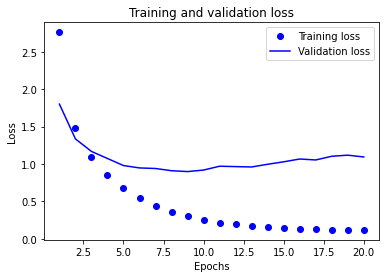

In [233]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### Listing 4.20 Plotting the training and validation accuracy

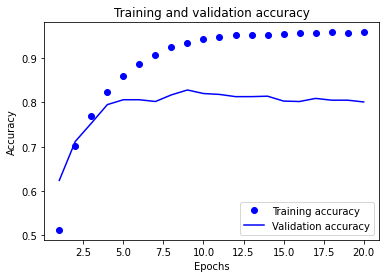

In [235]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label = "Training accuracy")
plt.plot(epochs, val_acc, "b", label = "Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The model begins to overfit after nine epochs. Let's train a new model from scratch for nine epochs and then evaluate it on the test set.
#### 4.21 Retraining a model from scratch

In [236]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])
model.fit(x_train,
          y_train,
          epochs = 9,
          batch_size = 512)
results = model.evaluate(x_test, y_test)
print(results)
#[0.9493677020072937, 0.7920747995376587]

Epoch 1/9
 4/18 [=====>........................] - ETA: 0s - loss: 3.4631 - accuracy: 0.3652

2021-09-11 13:03:58.857492: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 1s 13ms/step - loss: 2.4413 - accuracy: 0.5312
Epoch 2/9
18/18 [==============================] - 0s 10ms/step - loss: 1.3415 - accuracy: 0.7080
Epoch 3/9
18/18 [==============================] - 0s 10ms/step - loss: 1.0014 - accuracy: 0.7856

2021-09-11 13:04:00.744474: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


71/71 [==============================] - 0s 5ms/step - loss: 0.9494 - accuracy: 0.7921
[0.9493677020072937, 0.7920747995376587]


This approach reaches an accuracy of ~80% What would be the accuracy of a random baseline? We could try quickly implementing one to check this empiracally:

In [237]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
print(hits_array.mean()) # 0.18165627782724844

0.18165627782724844


A random classifier would get around 18% accuracy, so our results (nearly 80%) are much better.
#### 4.2.5 Generating predictions on new data
Calling the model’s predict method on new samples returns a class probability distribution over all 46 topics for each sample. Let’s generate topic predictions for all of the test data.

In [238]:
predictions = model.predict(x_test)

2021-09-11 13:10:56.171857: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


The largest entry is the predicted class—the class with the highest probability:

In [239]:
np.argmax(predictions[0])

4

The result is 4

#### 4.2.9 Wrapping up

Here’s what you should take away from this example:<br><br>
• If you’re trying to classify data points among N classes, your model should end with a `Dense` layer of size <i>N</i>.<br>
• In a single-label, multiclass classification problem, your model should end with a `softmax` activation so that it will output a probability distribution over the <i>N</i> output classes.<br>
• Categorical crossentropy is almost always the loss function you should use for such problems. It minimizes the distance between the probability distributions output by the model and the true distribution of the targets.<br>
• There are two ways to handle labels in multiclass classification:<br>
<pre>• Encoding the labels via categorical encoding (also known as one-hot encoding) and using `categorical_crossentropy` as a loss function.
<br>• Encoding the labels as integers and using the `sparse_categorical_crossentropy` loss function<br></pre>
• If you need to classify data into a large number of categories, you should avoid creating information bottlenecks in your model due to intermediate layers that are too small.

### 4.3 Predicting House Prices: A Regression Example

You’ll attempt to predict the median price of homes in a given Boston suburb in the mid-1970s, given data points about the suburb at the time, such as the crime rate, the local property tax rate, and so on. The dataset you’ll use has an interesting difference from the two previous examples. It has relatively few data points: only 506, split between 404 training samples and 102 test samples. And each <b><i><span style="color:blue">feature</span></i></b> in the input data (for example, the crime rate) has a different scale. For instance, some values are proportions, which take values between 0 and 1; others take values between 1 and 12, others between 0 and 100, and so on.
#### Listing 4.23 Loading the Boston housing dataset

In [256]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

Let's look at the dimensions of the data:

In [257]:
print(train_data.shape)
print(test_data.shape)

(404, 13)
(102, 13)


The targets here are the median values of owner-occupied homes, in thousands of dollars:

In [258]:
print(train_targets)

[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3  8.8 19.2 19.4 23.1 23.  14.8 48.8 22.6 33.4 21.1 13.6
 32.2 13.1

#### 4.3.2 Preparing the data
It would be problematic to feed into a neural network values that all take wildly different ranges. The model might be able to automatically adapt to such heterogeneous data, but it would definitely make learning more difficult. A widespread best practice to deal with such data is to do feature-wise normalization: for each feature in the input data (a column in the input data matrix), you subtract the mean of the feature and divide by the standard deviation, so that the feature is centered around 0 and has a unit standard deviation. This is easily done in NumPy.
#### Listing 4.24, Normalizing the data

In [263]:
mean = train_data.mean(axis = 0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

#### Listing 4.25 Model definition

In [264]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss = "mse", metrics=["mae"])
    return model

#### 4.3.4 Validating your approach using K-fold validation
The best practice in such situations is to use <b><i><span style="color:blue">K-fold</span></i></b> cross-validation (see figure 4.8). It consists of splitting the available data into <i>K</i> partitions (typically <i>K</i> = 4 or 5), instantiating <i>K</i> identical models, and training each one on <i>K</i> – 1 partitions while evaluating on the remaining partition. The validation score for the model used is then the average of the <i>K</i> validation scores obtained.

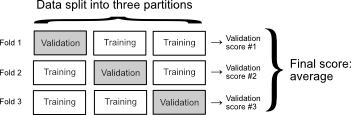

In [265]:
from IPython.display import Image
Image(filename= "K-fold_cross_validation.jpg")

#### Listing 4.26 K-fold validation

In [268]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i+1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs,
              batch_size = 16, verbose = 0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 0)
    all_scores.append(val_mae)

processing fold #0


2021-09-11 15:13:26.533417: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-09-11 15:13:35.427951: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


processing fold #1


2021-09-11 15:13:35.920456: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-09-11 15:13:44.813100: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


processing fold #2


2021-09-11 15:13:45.030478: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-09-11 15:13:53.076420: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


processing fold #3


2021-09-11 15:13:53.285607: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-09-11 15:14:01.314965: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [269]:
print(all_scores)
print(np.mean(all_scores))

[1.9632316827774048, 2.3531482219696045, 2.4475693702697754, 2.393336296081543]
2.289321392774582


The different runs do indeed show rather different validation scores, from 2.1 to 3.1. The average (2.6) is a much more reliable metric than any single score—that’s the entire point of K-fold cross-validation. In this case, you’re off by $2,300 on average, which is significant considering that the prices range from $10,000 to $50,000.<br>
Let’s try training the model a bit longer: 500 epochs. To keep a record of how well the model does at each epoch, you’ll modify the training loop to save the per-epoch validation score log.

In [271]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples:],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()

    history = model.fit(partial_train_data, partial_train_targets,
                  validation_data = (val_data, val_targets),
                  epochs = num_epochs, batch_size = 16, verbose = 0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0


2021-09-11 15:31:50.217870: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-09-11 15:31:50.437902: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Processing fold #1


2021-09-11 15:32:44.284717: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-09-11 15:32:44.482052: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Processing fold #2


2021-09-11 15:33:37.442110: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-09-11 15:33:37.642521: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Processing fold #3


2021-09-11 15:34:32.481422: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-09-11 15:34:32.691133: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


You can then compute the average of the per-epoch MAE scores for all folds.
#### Listing 4.28 Building the history of successive mean K-fold validation scores

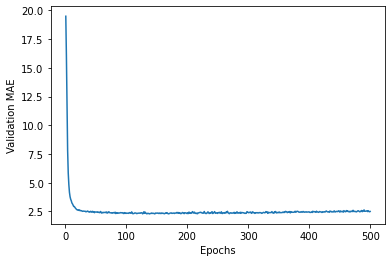

In [272]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
# Let's plot this:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

It may be a little difficult to read the plot, due to a scaling issue: the validation MAE for the first few epochs is dramatically higher than the values that follow. Let’s omit the first 10 data points, which are on a different scale than the rest of the curve:
#### Listing 4.30 Plotting validation scores, excluding the first 10 data points:

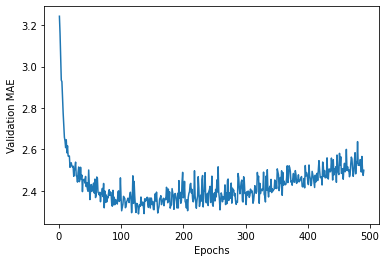

In [273]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

According to this plot, validation MAE stops improving significantly after 120-140 epochs (this number includes the 10 epochs we omitted). Past that point, you start overfitting.
Once you’re finished tuning other parameters of the model (in addition to the number of epochs, you could also adjust the size of the intermediate layers), you can train a final production model on all of the training data, with the best parameters, and then look at its performance on the test data.
#### Listing 4.31, Training the final model

In [274]:
model = build_model()
model.fit(train_data, train_targets,
          epochs = 130, batch_size = 16, verbose = 0)
test_mse_scor, test_mae_score = model.evaluate(test_data, test_targets)

2021-09-11 15:39:39.919243: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 4ms/step - loss: 16.7174 - mae: 2.6087
2.6087441444396973


2021-09-11 15:39:54.565851: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [275]:
print(test_mae_score)

2.6087441444396973


Still off by approximately $2,600
#### 4.3.5 Generating predictions on new data
Now, with this scalar regression model, predict() returns the model’s guess for the sample’s price in thousands dollars:

In [276]:
predictions = model.predict(test_data)
predictions[0]

2021-09-11 15:42:01.757736: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([8.41802], dtype=float32)

The first house is predicted to have a price around $8,400
#### 4.3.6 Wrapping up
Here’s what you should take away from this scalar regression example:<br>
• Regression is done using different loss functions than what we used for classification. Mean squared error (MSE) is a loss function commonly used for regression.
• Similarly, evaluation metrics to be used for regression differ from those used for classification; naturally, the concept of accuracy doesn’t apply for regression. A common regression metric is mean absolute error (MAE).<br>
• When features in the input data have values in different ranges, each feature should be scaled independently as a preprocessing step.<br>
• When there is little data available, using K-fold validation is a great way to reliably evaluate a model.<br>
• When little training data is available, it’s preferable to use a small model with few intermediate layers (typically only one or two), in order to avoid severe overfitting.<br>